<a href="https://colab.research.google.com/github/Mirlaa/Keras-primeiros-passos/blob/main/Preparando-Ambiente/Notebook_Keras_primeiros_passos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras: Redes Neurais

O Iris dataset é um conjunto de dados bem conhecido na comunidade academica, esse conjunto de dados consiste em 50 amostras de cada uma das três espécies (150 amostras, no total) de Iris: *Iris setosa, Iris virginica e Iris versicolor*.

Quatro variáveis foram medidas em cada amostra: o comprimento (*length*) e a largura (*width*) das sépalas (*Sepal*) e pétalas (*Petal*), em centímetros. Com base na combinação dessas quatro características, é possível distinguir as espécies umas das outras.

![](https://kedro.readthedocs.io/en/0.17.5/_images/iris_measurements.png)

Abaixo a representação dos três tipos de flores Iris.

![](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png)

In [36]:
from tensorflow import keras
from sklearn import datasets
import pandas as pd
import numpy as np

## Dados

### Importando os dados

In [10]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris = datasets.load_iris(return_X_y = True)
x = iris[0]
y = iris[1]

- características da íris

In [11]:
# campos do x
datasets.load_iris()['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- tipos de íris

In [12]:
# valores de classificação
datasets.load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

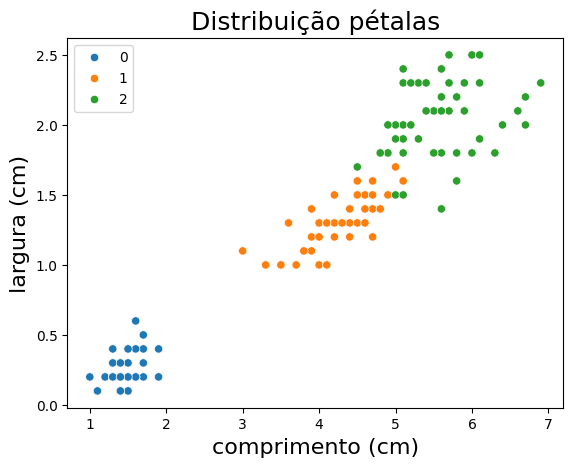

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=x[:,2],y=x[:,3],hue=y,palette='tab10')
plt.xlabel('comprimento (cm)',fontsize =16)
plt.ylabel('largura (cm)', fontsize=16)
plt.title('Distribuição pétalas', fontsize = 18)
plt.show()

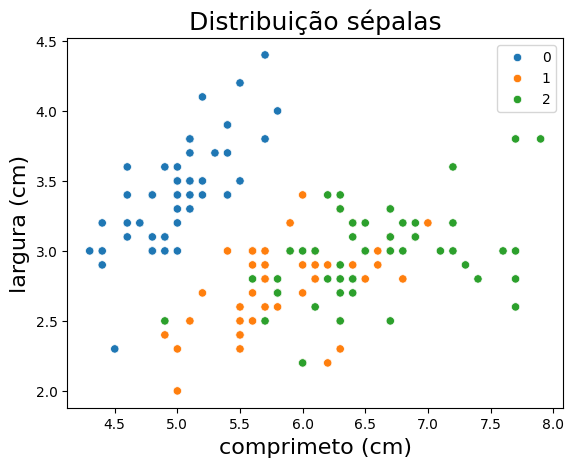

In [16]:
sns.scatterplot(x = x[:,0], y = x[:,1], hue = y, palette = "tab10")
plt.xlabel('comprimeto (cm)', fontsize = 16)
plt.ylabel('largura (cm)', fontsize = 16)
plt.title('Distribuição sépalas', fontsize = 18)
plt.show()

#### Categorização

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
y = keras.utils.to_categorical(y)

In [19]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

#### Normalização

Os dados serão normalizados entre [0, 1]


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [22]:
x

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [24]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state=1)

## Modelo - MLP

### Criação do modelo

1 camada de entrada, 1 camada oculta e 1 camada de saída.

In [27]:

modelo = keras.Sequential([
    keras.layers.InputLayer(input_shape=[4,], name='entrada'),
    keras.layers.Dense(512, activation='relu', name='oculta', kernel_initializer=keras.initializers.RandomNormal(seed=142)),
    keras.layers.Dense(3, activation='softmax', name='saida')
])

In [28]:
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ oculta (Dense)                  │ (None, 512)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ saida (Dense)                   │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,099 (16.01 KB)

 Trainable params: 4,099 (16.01 KB)

 Non-trainable params: 0 (0.00 B)

### Treinamento

In [29]:
modelo.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

In [30]:
historico = modelo.fit(x_treino, y_treino, epochs=100, validation_split=0.3)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - categorical_accuracy: 0.1663 - loss: 1.0800 - val_categorical_accuracy: 0.5938 - val_loss: 1.0432
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.7761 - loss: 0.9864 - val_categorical_accuracy: 0.5938 - val_loss: 0.9982
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.7410 - loss: 0.9421 - val_categorical_accuracy: 0.5938 - val_loss: 0.9703
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.7214 - loss: 0.9059 - val_categorical_accuracy: 0.5938 - val_loss: 0.9407
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.7371 - loss: 0.8656 - val_categorical_accuracy: 0.5938 - val_loss: 0.9125
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.7371 - loss: 0.8291 - val_categorical_accuracy: 0.5938 - val_loss: 0.8834
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.7292 - loss: 0.8009 - va

**Interpretando a exibição:**

Exemplo de exibição: 
```
Epoch 100/100
3/3 [==============================] - 0s 47ms/step - loss: 0.1451 - categorical_accuracy: 0.9524 - val_loss: 0.1456 - val_categorical_accuracy: 0.9722
```
- A época de treinamento: *`Epoch 100/100`*
- Quantidade de **instâncias processadas**: *`3/3`*
  * Aqui, temos a quantidade de amostras divididas pela número de [batch_size](https://www.deeplearningbook.com.br/o-efeito-do-batch-size-no-treinamento-de-redes-neurais-artificiais/). Normalmente a batch é definida com 32 no keras, temos 84 amostras (70% do conjunto de treino) no treinamento, resultando assim em aproximadamente 3 instâncias.
- A barra de progresso: *`[==============================]`*
- Tempo de treinamento de cada amostra: *`0s 13ms/step`*
- Perda e acurária no conjunto de treinamento: *`loss: 0.1506 - categorical_accuracy: 0.9524`*
- Perda e acurária no conjunto de validação: *`val_loss: 0.1494 - val_categorical_accuracy: 0.9722`*

### Avaliação

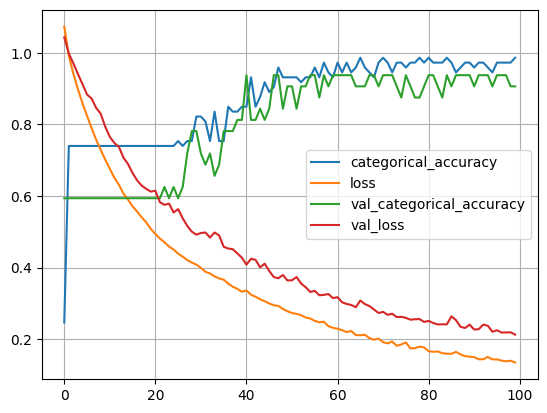

In [31]:
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

Para observar mais de perto o aprendizado do modelo podemos plotar curvas individuais e perceber como no aprendizado, ambos os conjuntos obtiveram resultados similares. Isso nos garante que não ocorreu sobreajuste no treinamento.

A constancia das curvas é diferente pois os valores de erro  da validação é calculada por época e para o treinamento é feito uma média dos valores de erro durante as iterações de cada época.

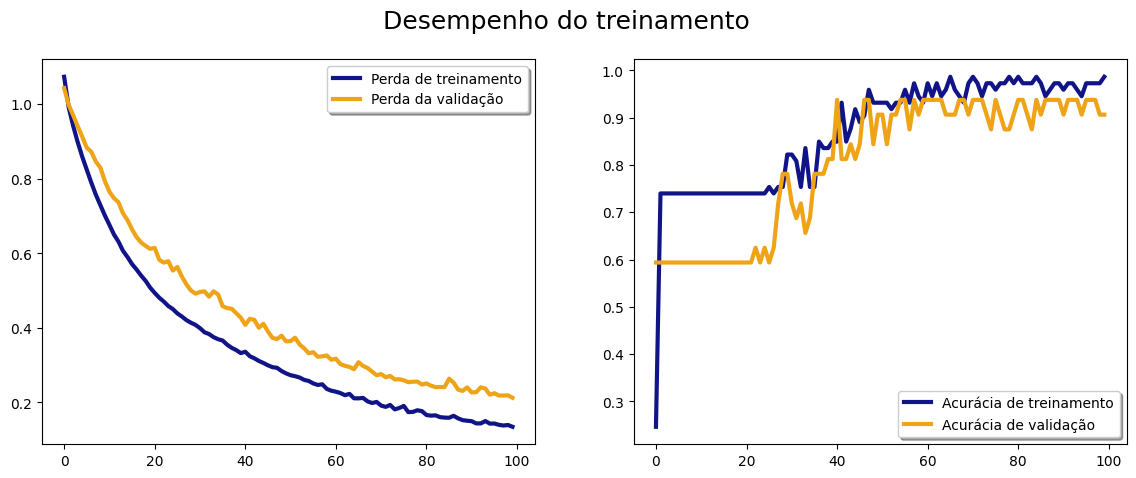

In [32]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['categorical_accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_categorical_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

#### Teste

Podemos testar o modelo e verificar seu resultado final através do método [`evaluate`](https://keras.io/api/models/model_training_apis/#:~:text=%5Bsource%5D-,evaluate%20method,-Model.evaluate) que nos mostra a perda e acurácia obtida no conjunto de teste.

In [33]:
modelo.evaluate(x_teste,y_teste)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.9748 - loss: 0.1491  


[0.15021488070487976, 0.9777777791023254]

O método [`predict`](https://keras.io/api/models/model_training_apis/#:~:text=%5Bsource%5D-,predict%20method,-Model.predict) gera a predição do modelo para as entradas enviadas.

Faremos o teste: as entradas `[[0.61, 0.5, 0.69, 0.79]]` devem resultar em uma indicação de flor Virginica - `[0., 0., 1.]`

In [38]:
prever = np.array([[0.61, 0.5, 0.69, 0.79]])
prevendo = modelo.predict(prever)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [39]:
iris['target_names'][prevendo.argmax()]

'virginica'